<a href="https://colab.research.google.com/github/NolanRink/Supervised-Learning/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Directions: Iterative Logistic Regression for Binary Classification on Iris Dataset

**Objective:** Implement an iterative logistic regression algorithm (e.g., gradient ascent/descent) for binary classification and apply it to the Iris classification dataset.

**Dataset:** Iris classification dataset (available at: https://archive.ics.uci.edu/Links to an external site.).

**Instructions:**

1.  Select only the data points belonging to two of the three classes (Iris Setosa and Iris Versicolour) from the Iris dataset.
2.  Divide the selected data randomly into training and test sets with an 80%-20% ratio, respectively.
3.  Implement an iterative logistic regression algorithm for binary classification.
4.  Train your implemented algorithm using the training data.
5.  Test the trained algorithm on the test data.
6.  Calculate and report the classification accuracy on the test data.

**Submission:**

Submit your program code and execution results, including the classification accuracy on the test data, in a single document.

In [ ]:
%pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


np.random.seed(44)

In [3]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, bias=0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

        self.prev_costs = []

    def sigmoid(self, z):
        # Sigmoid funtion
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y_true, y_pred):
        # Cross entropy loss
        m = len(y_true)
        return (-1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        # Initialize weights and bias
        j, k = X.shape
        self.weights = np.zeros(k)
        self.bias = 0

        for _ in range(self.num_iterations):
          z = np.dot(X, self.weights) + self.bias
          h = self.sigmoid(z)

          dw = (1/j) * np.dot(X.T, (h - y))
          db = (1/j) * np.sum(h - y)

          self.weights -= self.learning_rate * dw
          self.bias -= self.learning_rate * db

          # Calculate and store cost values
          cost = self.cost_function(y, h)
          self.prev_costs.append(cost)


    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        # return 1 for iris setosa or 0 for iris versicolor
        return (y_pred >= 0.5).astype(int)

    def predict_pct(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        # return 1 for iris setosa or 0 for iris versicolor
        return y_pred

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


In [5]:
# First 100 are iris setosa and iris versicolor
filtered_X = X[:100].copy()
filtered_y = y[:100].copy()

# Map class names to numerical values
class_mapping = {'Iris-setosa': 1, 'Iris-versicolor': 0}
filtered_y['class'] = filtered_y['class'].map(class_mapping)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(filtered_X, filtered_y['class'], test_size=0.2, random_state=44)

In [7]:
clf = LogisticRegression(learning_rate=.01)

In [8]:
clf.fit(x_train, y_train)

In [9]:
accuracy_score(y_test, clf.predict(x_test))

1.0

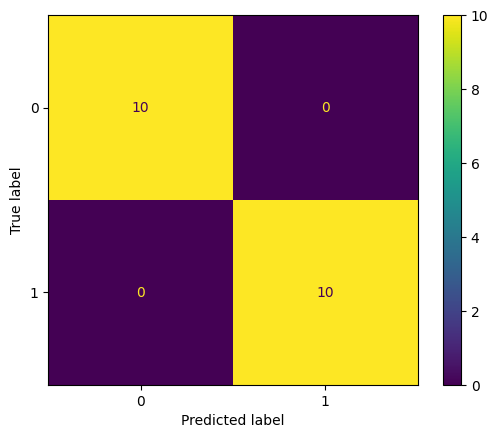

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(x_test))
plt.show()

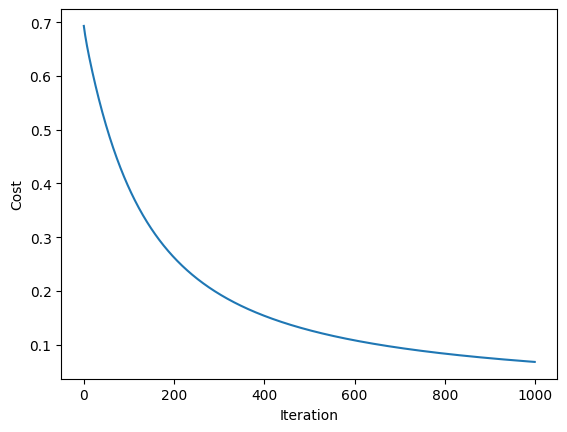

In [11]:
plt.plot(clf.prev_costs)
plt.ylabel("Cost")
plt.xlabel("Iteration")
plt.show()


In [13]:
print(classification_report(y_test, clf.predict(x_test), target_names=['Versicolor','Setosa']))


              precision    recall  f1-score   support

  Versicolor       1.00      1.00      1.00        10
      Setosa       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

